In [3]:
import geopandas as gpd
import shapely.ops as sh
import pickle
import os
import numpy as np
import vis_methods as vs

In [4]:
river_path = r'C:\Users\bpara\Geo data\ne_10m_rivers_lake_centerlines\ne_10m_rivers_lake_centerlines.shp'

In [5]:
main_path = r'C:\Users\bpara\Geo data\Correlation Results'

with open(os.path.join(main_path, r'amo corr'), 'rb') as f:
    amo_data = pickle.load(f)
        
with open(os.path.join(main_path, r'Nina corr'), 'rb') as f:
    nina_data = pickle.load(f)
        
with open(os.path.join(main_path, r'Nino corr'), 'rb') as f:
    nino_data = pickle.load(f)
        
with open(os.path.join(main_path, r'pdo corr'), 'rb') as f:
    pdo_data = pickle.load(f)
        
with open("flood rank", 'rb') as f:
    flood_data = pickle.load(f)

In [6]:
shapefile = gpd.read_file(river_path)

In [7]:
def merge_rivers(indicies, file):
    rivers = []
    for i in indicies:
        for l in file["geometry"][i]:
            rivers.append(l)
    return sh.linemerge(rivers)

In [8]:
mississippi_basin = merge_rivers([233, 234, 588, 1258, 1259, 1293, 205], shapefile)

In [9]:
#takes a shapely multiline segment, and compresses it down to a list of ordered pairs (tuples) which are rounded to the nearest 0.05 degrees
def get_point_list(mls):
    point_list = []
    for segment in mls:
        for coord in segment.coords:
            point_list.append((round(round(coord[0], 1)+0.05, 2), round(round(coord[1], 1) + 0.05, 2)))
            point_list = list(dict.fromkeys(point_list))
            
    return point_list

In [10]:
trimmed_rivers = get_point_list(mississippi_basin)
len(trimmed_rivers)

1095

In [11]:
#this replaces every value not at a point in the trimmed rivers data set with NaN so it won't be graphed by matplotlib
def trim_to_river(river_points, data, datakey):
    result = data.copy()
    for lat_i in range(len(result["lat"])):
        for lon_i in range(len(result["lon"])):
            point = (round(data["lon"][lon_i],2), round(result["lat"][lat_i], 2))
            if point not in river_points:
                result[datakey][lat_i][lon_i] = np.nan
    return result

In [12]:
amo_trimmed = trim_to_river(trimmed_rivers, amo_data, "pearson")
pdo_trimmed = trim_to_river(trimmed_rivers, pdo_data, "pearson")
nino_trimmed = trim_to_river(trimmed_rivers, nino_data, "pearson")
nina_trimmed = trim_to_river(trimmed_rivers, nina_data, "pearson")
flood_trimmed = trim_to_river(trimmed_rivers, flood_data, "position")

0
223


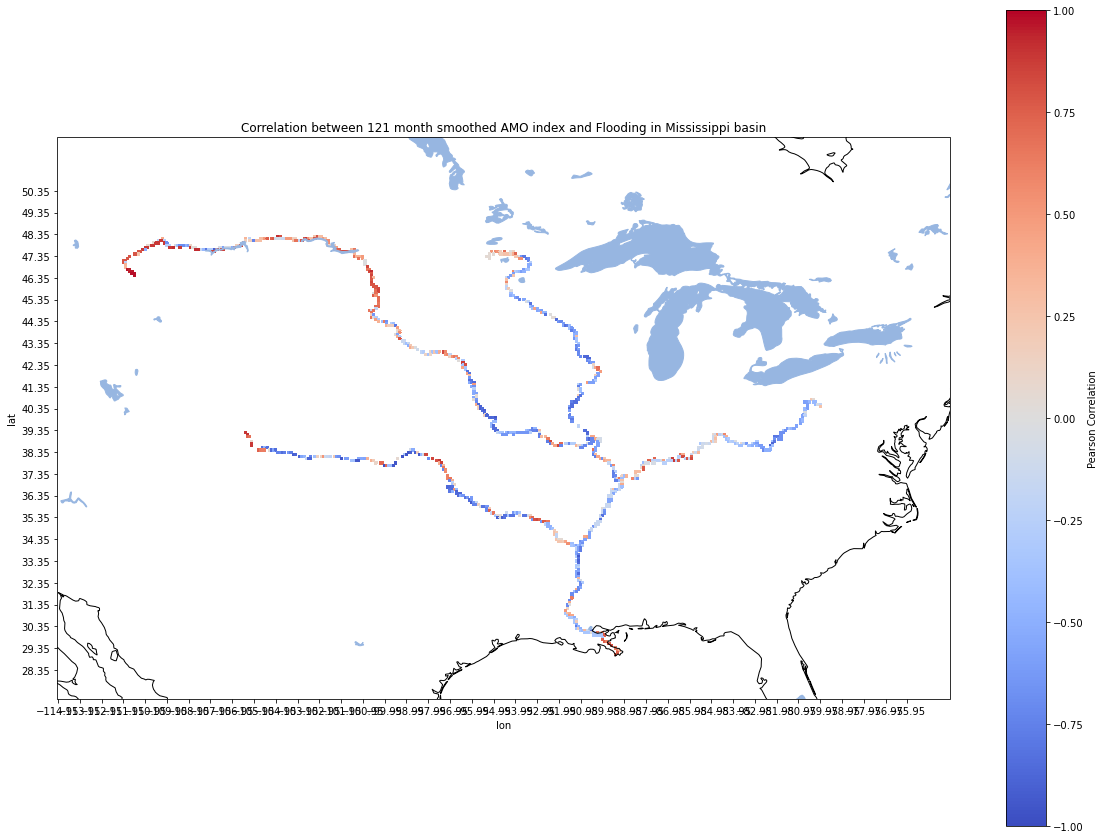

In [15]:
vs.plot_data(amo_trimmed["lon"], amo_trimmed["lat"], np.asarray(amo_trimmed["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed AMO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)

0
223


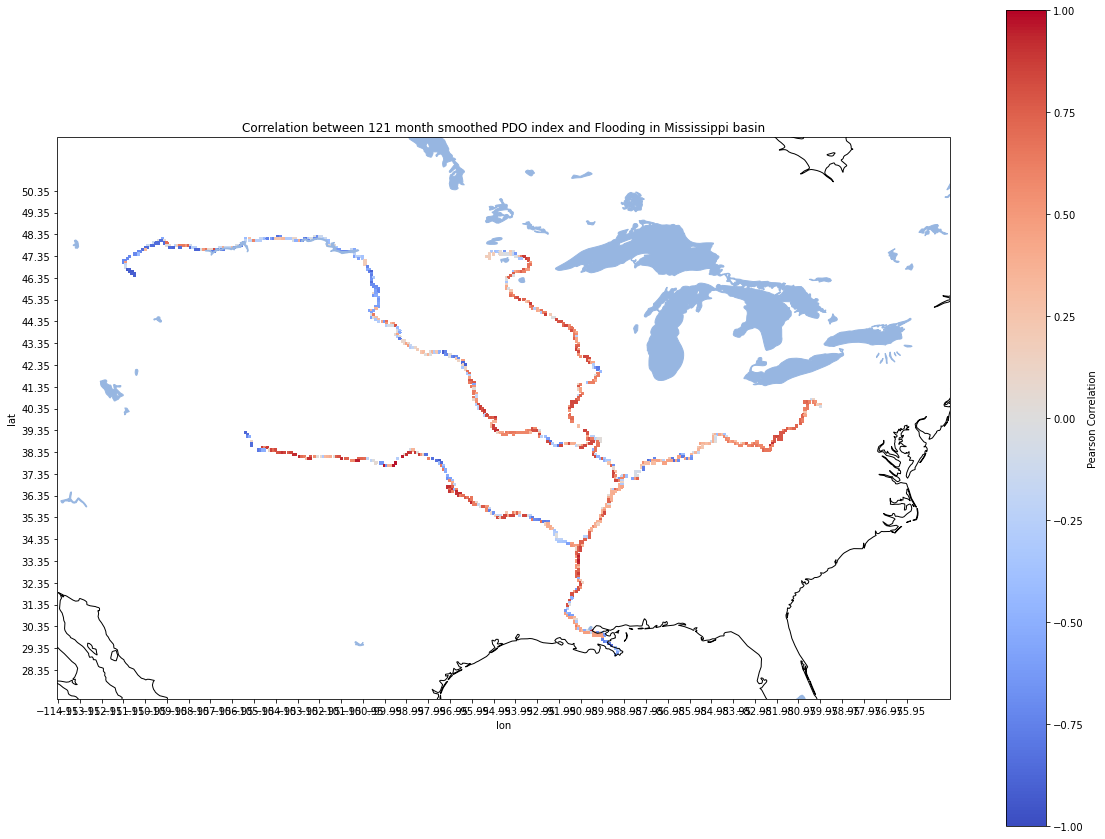

In [17]:
vs.plot_data(pdo_trimmed["lon"], pdo_trimmed["lat"], np.asarray(pdo_trimmed["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed PDO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)

0
223


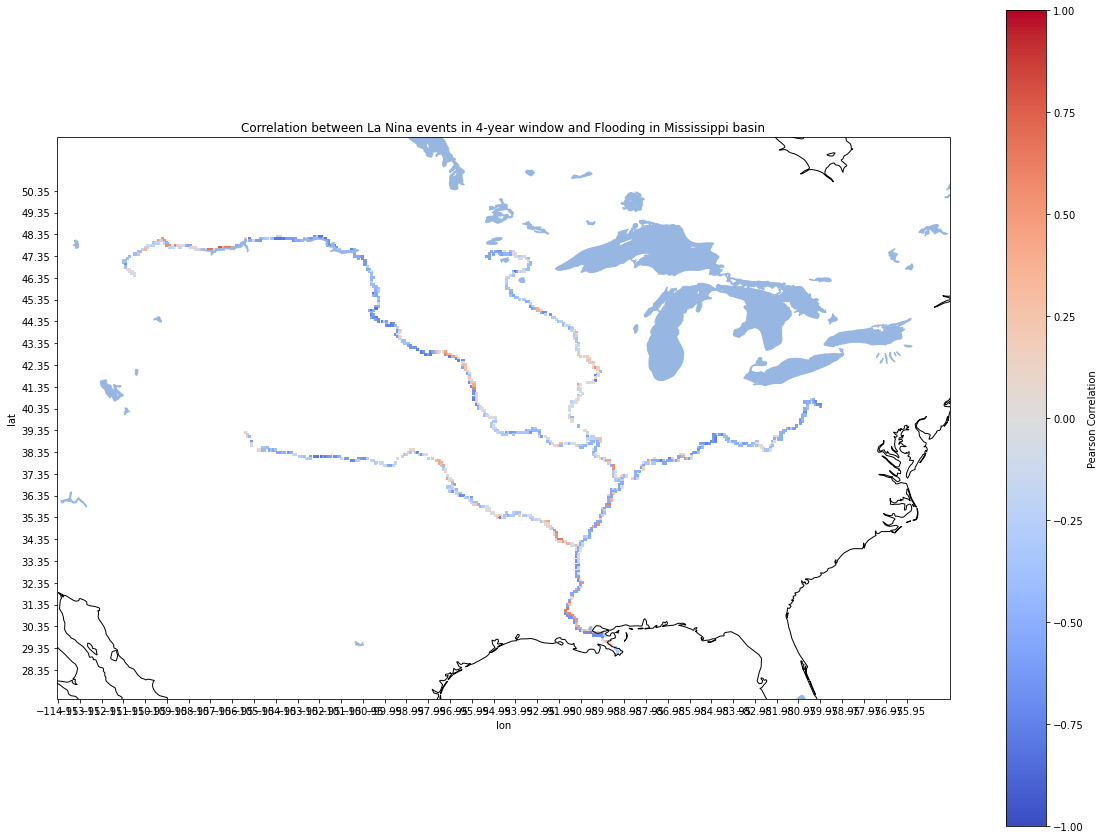

In [23]:
vs.plot_data(nina_trimmed["lon"], nina_trimmed["lat"], np.asarray(nina_trimmed["pearson"]), "Pearson Correlation", "Correlation between La Nina events in 4-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)

0
223


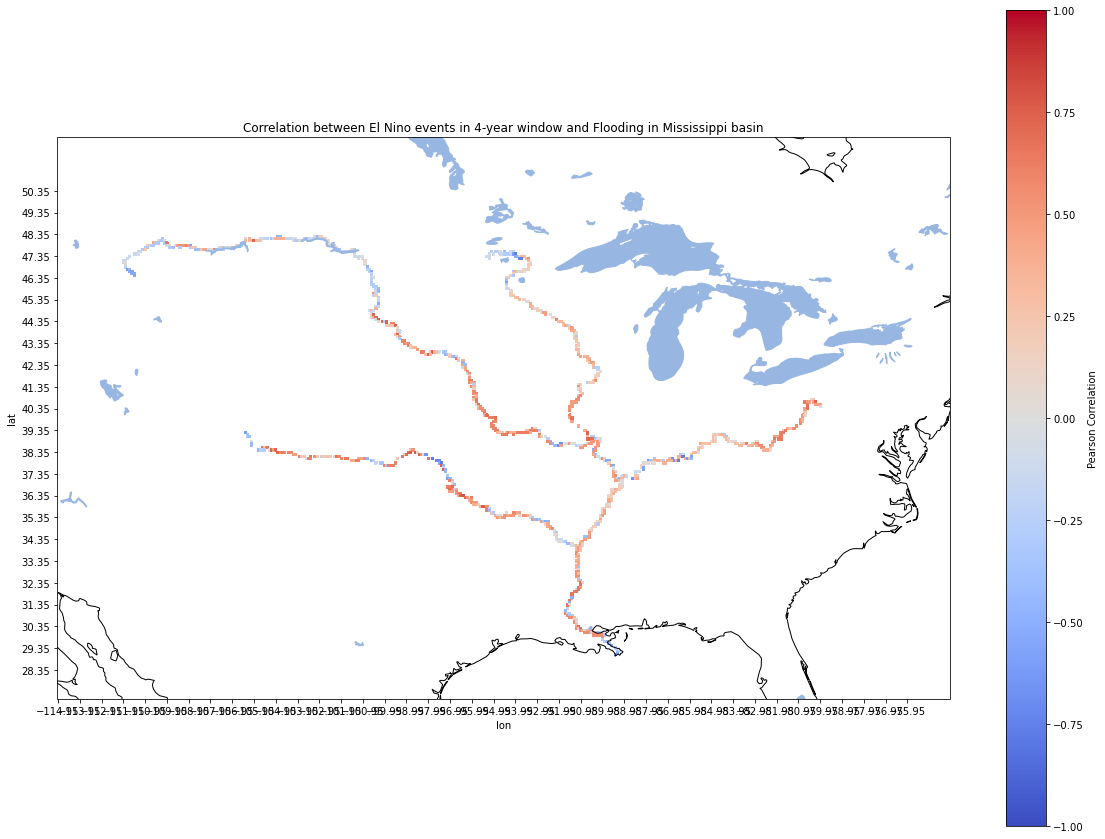

In [24]:
vs.plot_data(nino_trimmed["lon"], nino_trimmed["lat"], np.asarray(nino_trimmed["pearson"]), "Pearson Correlation", "Correlation between El Nino events in 4-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)

0
223


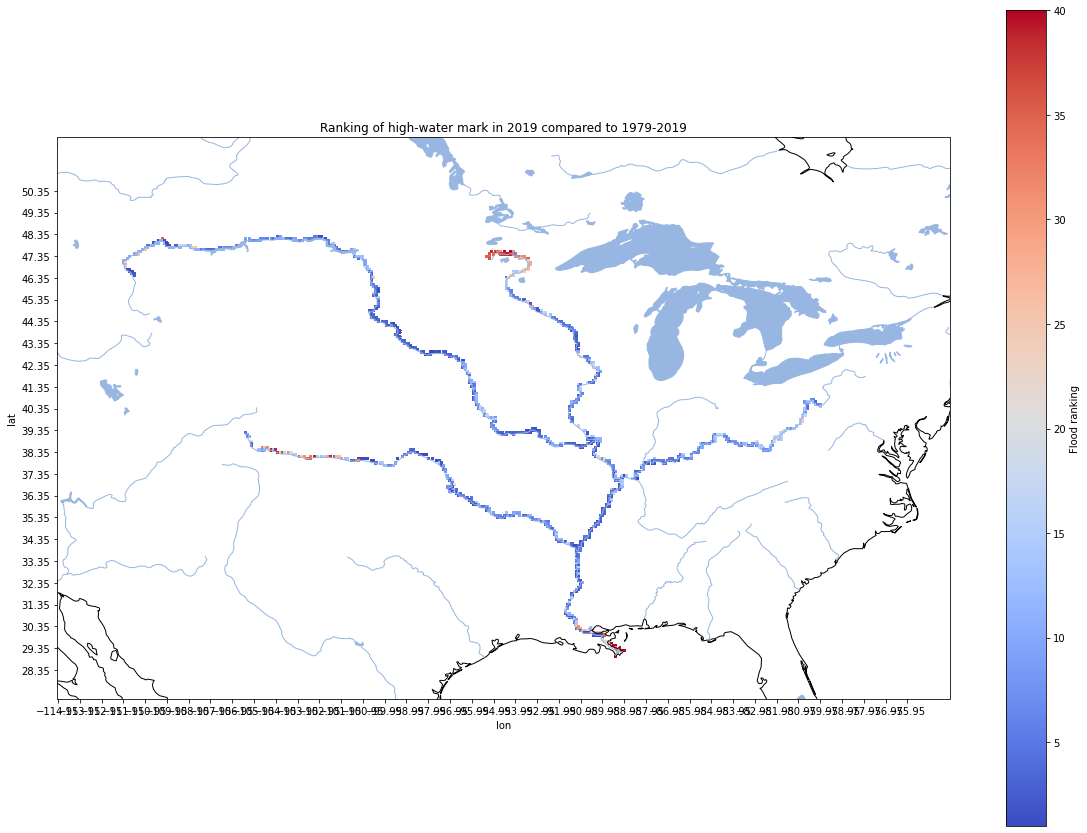

In [20]:
vs.plot_data(flood_trimmed["lon"], flood_trimmed["lat"], np.asarray(flood_trimmed["position"]), "Flood ranking", "Ranking of high-water mark in 2019 compared to 1979-2019",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_rivers = True)